<a href="https://colab.research.google.com/github/sujeet311/Quantuma_Boosting/blob/main/roc_auc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from numpy import loadtxt
X_train = loadtxt('/content/drive/MyDrive/FINALCODE/Data/traintest/X_train.csv',delimiter=',')
y_train = loadtxt('/content/drive/MyDrive/FINALCODE/Data/traintest/y_train.csv',delimiter=',')
X_test = loadtxt('/content/drive/MyDrive/FINALCODE/Data/traintest/X_test.csv',delimiter=',')
y_test = loadtxt('/content/drive/MyDrive/FINALCODE/Data/traintest/y_test.csv',delimiter=',')

In [ ]:
y_train = (2* y_train )-1
y_test = (2* y_test) -1

In [ ]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
import joblib
import joblib
QBC= joblib.load('/content/drive/MyDrive/FINALCODE/Model/QBC.pkl' )  # qboost
ada = joblib.load('/content/drive/MyDrive/FINALCODE/Model/ada.pkl' )   #  Adaboost
wt_avg=joblib.load('/content/drive/MyDrive/FINALCODE/Model/Wt_avg.pkl' )  #weighted average
xgb=joblib.load('/content/drive/MyDrive/QC Code/model/xgb.pkl' )  #weighted average
cgb=joblib.load('/content/drive/MyDrive/QC Code/model/cgb.pkl' )  #weighted average
qene = joblib.load('/content/drive/MyDrive/FINALCODE/Model/Qensembl.pkl' )
wt=joblib.load('/content/drive/MyDrive/FINALCODE/Qmodel/WT_AVG.pkl' )  #weighted average

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve,accuracy_score,classification_report


In [ ]:
y_pred = qene.predict(X_test)
ada_acc = accuracy_score(y_test, y_pred)
print(ada_acc)


0.8907028389652482


In [ ]:
# classification report
target_names = ['Non-Dibetic','Dibetic']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

 Non-Dibetic       0.94      0.84      0.88     58030
     Dibetic       0.85      0.94      0.90     58597

    accuracy                           0.89    116627
   macro avg       0.90      0.89      0.89    116627
weighted avg       0.90      0.89      0.89    116627



In [ ]:
y_pred = wt.predict(X_test)
ada_acc = accuracy_score(y_test, y_pred)
print(ada_acc)
# classification report
target_names = ['Non-Dibetic','Dibetic']
print(classification_report(y_test, y_pred,target_names=target_names))

0.8913287660661768
              precision    recall  f1-score   support

 Non-Dibetic       0.94      0.83      0.88     58030
     Dibetic       0.85      0.95      0.90     58597

    accuracy                           0.89    116627
   macro avg       0.90      0.89      0.89    116627
weighted avg       0.90      0.89      0.89    116627



In [ ]:
y_pred = wt_avg.predict(X_test)
ada_acc = accuracy_score(y_test, y_pred)
print(ada_acc)
# classification report
target_names = ['Non-Dibetic','Dibetic']
print(classification_report(y_test, y_pred,target_names=target_names))

0.8500861721556758
              precision    recall  f1-score   support

 Non-Dibetic       0.89      0.80      0.84     58030
     Dibetic       0.82      0.90      0.86     58597

    accuracy                           0.85    116627
   macro avg       0.85      0.85      0.85    116627
weighted avg       0.85      0.85      0.85    116627



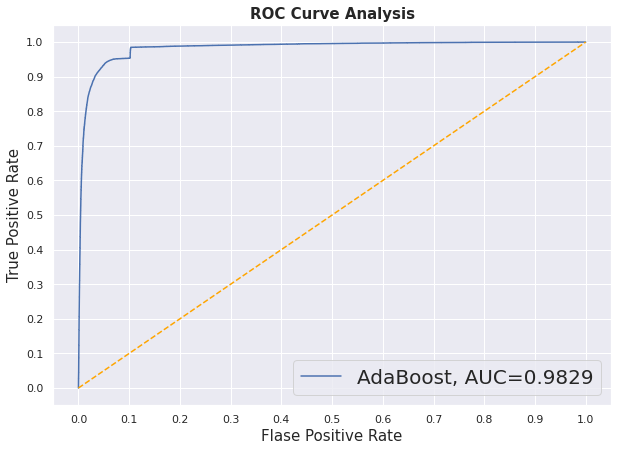

In [ ]:
#set up plotting area
fig = plt.figure(figsize=(10,7))
# Option 1
plt.rcParams['font.size'] = 25

model = ada

y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="AdaBoost, AUC="+str(auc))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':20}, loc='lower right')

plt.show()

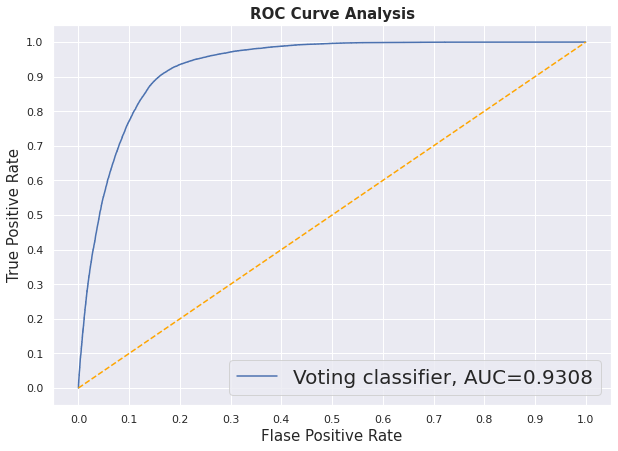

In [ ]:
#set up plotting area
fig = plt.figure(figsize=(10,7))


model = wt

y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Voting classifier, AUC="+str(auc))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':20}, loc='lower right')

plt.show()

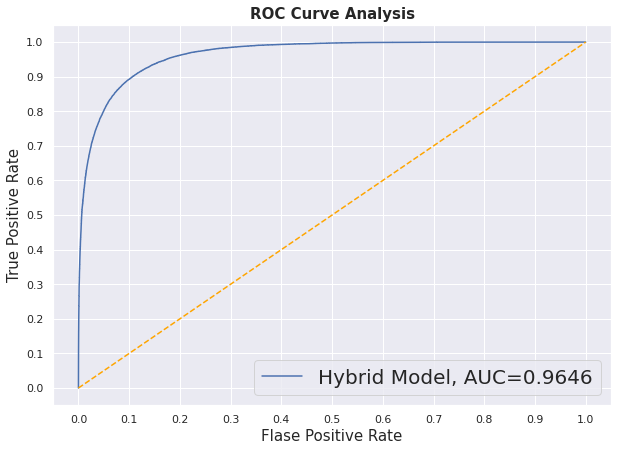

In [ ]:
#set up plotting area
fig = plt.figure(figsize=(10,7))


model = qene

y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Hybrid Model, AUC="+str(auc))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':20}, loc='lower right')

plt.show()

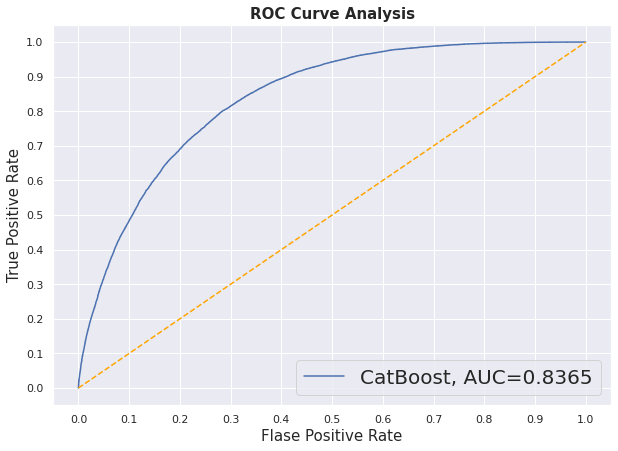

In [ ]:
#set up plotting area
fig = plt.figure(figsize=(10,7))


model = cgb

y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="CatBoost, AUC="+str(auc))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':20}, loc='lower right')

plt.show()

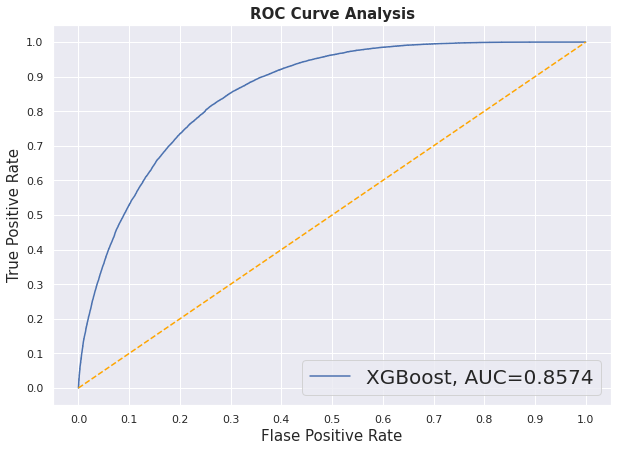

In [ ]:
#set up plotting area
fig = plt.figure(figsize=(10,7))


model = xgb

y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':20}, loc='lower right')

plt.show()

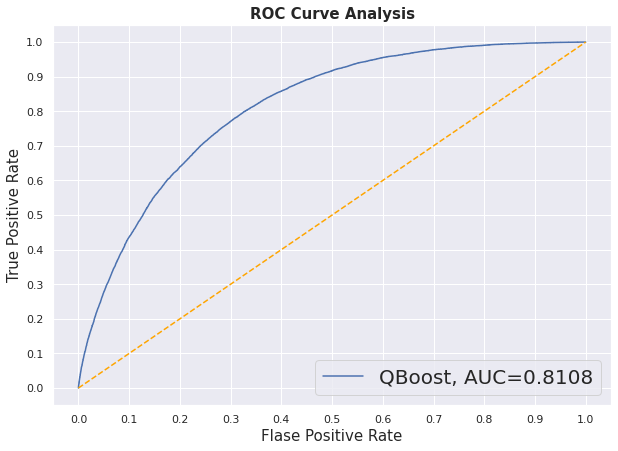

In [ ]:
#set up plotting area
fig = plt.figure(figsize=(10,7))


model = QBC

y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="QBoost, AUC="+str(auc))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':20}, loc='lower right')

plt.show()

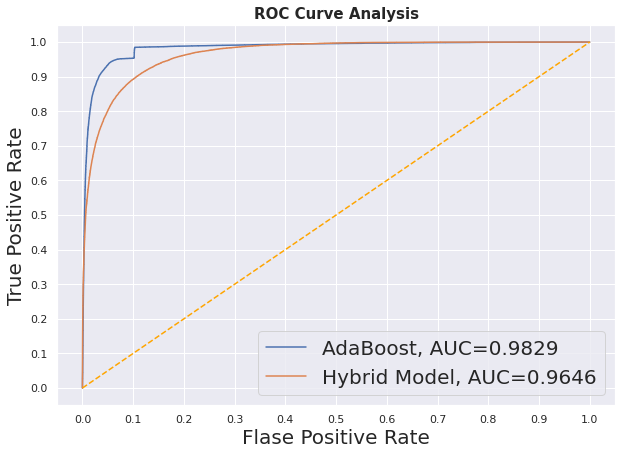

In [ ]:
#set up plotting area
fig = plt.figure(figsize=(10,7))


model = ada

y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="AdaBoost, AUC="+str(auc))


model = qene

y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Hybrid Model, AUC="+str(auc))



plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=20)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=20)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':20}, loc='lower right')

plt.show()


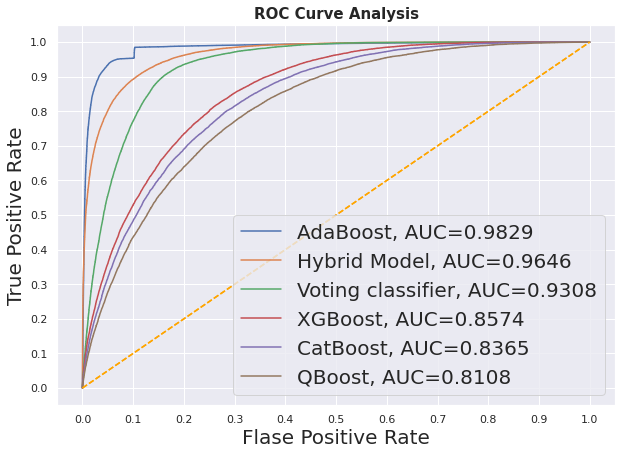

In [ ]:
#set up plotting area
fig = plt.figure(figsize=(10,7))


model = ada

y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="AdaBoost, AUC="+str(auc))




model = qene

y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Hybrid Model, AUC="+str(auc))

model = wt

y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Voting classifier, AUC="+str(auc))

model = xgb

y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

model = cgb

y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="CatBoost, AUC="+str(auc))

model = QBC

y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="QBoost, AUC="+str(auc))

plt.plot([0,1], [0,1], color='orange', linestyle='--')



plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=20)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=20)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':20}, loc='lower right')

plt.show()
